In [2]:
import tensorflow as tf


In [5]:
x = tf.ones(shape=(5,1))
print(x)

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(5, 1), dtype=float32)


In [7]:
x = tf.zeros(shape = (3,1))

print(x)

tf.Tensor(
[[0.]
 [0.]
 [0.]], shape=(3, 1), dtype=float32)


In [10]:
x = tf.random.normal(shape=(3,1), mean=100, stddev=10.)
print(x)

tf.Tensor(
[[ 99.56283]
 [111.3557 ]
 [114.94533]], shape=(3, 1), dtype=float32)


In [24]:
x = tf.random.uniform(shape=(3,1), minval=100, maxval=1000)
print(x)

tf.Tensor(
[[633.82965]
 [975.1224 ]
 [491.9289 ]], shape=(3, 1), dtype=float32)


In [29]:
input_var = tf.Variable(initial_value=3.0)
with tf.GradientTape() as tape:
    result = tf.square(input_var)

grad = tape.gradient(result, input_var)
print(grad)


tf.Tensor(6.0, shape=(), dtype=float32)


In [31]:
input_constant = tf.constant(3.0)
with tf.GradientTape() as tape:
    result = tf.square(input_constant)
grad = tape.gradient(result, input_constant)
print(grad)

None


In [32]:
input_constant = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(input_constant)
    result = tf.square(input_constant)
grad = tape.gradient(result, input_constant)
print(grad)

tf.Tensor(6.0, shape=(), dtype=float32)


In [52]:
import numpy as np
num_sample_per_class = 1000
neg_sample = np.random.multivariate_normal(
        mean=[0, 3], 
        cov=[[1, 0.5], [0.5, 1]], 
        size=num_sample_per_class)

pos_sample = np.random.multivariate_normal(
        mean=[3, 0], 
        cov=[[1, 0.5], [0.5, 1]], 
        size=num_sample_per_class)

In [54]:
inputs = np.vstack((neg_sample, pos_sample)).astype(np.float32)
targets = np.vstack((np.zeros((num_sample_per_class, 1), dtype="float32"), np.ones((num_sample_per_class, 1), dtype="float32")))

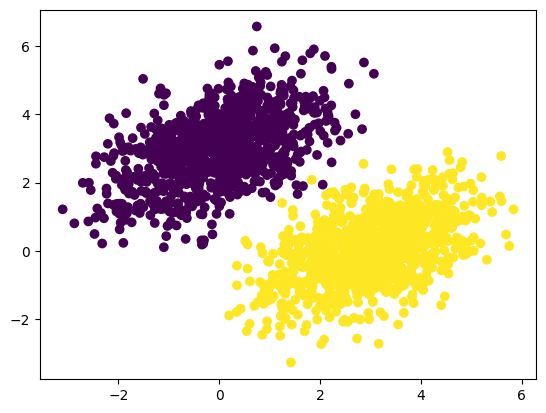

In [64]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [67]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros((output_dim,)))

In [69]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [70]:
def square_loss(targets, pred):
    per_sample_loss = tf.square(targets - pred)
    return tf.reduce_mean(per_sample_loss)

In [71]:
learning_rate = 0.1

def step(inputs, targets):
    with tf.GradientTape() as tape:
        pred = model(inputs)
        loss = square_loss(targets, pred)
    
    grad_wrt_W, grad_wrt_b = tape.gradient(loss, [W, b])
    
    W.assign_sub(grad_wrt_W*learning_rate)
    b.assign_sub(grad_wrt_b*learning_rate)
    
    return loss

In [75]:
from tqdm import tqdm

for epoch in tqdm(range(40)):
    loss = step(inputs, targets)
    print(f'loss at epoch: {epoch}: {loss:.4f}')

100%|██████████| 40/40 [00:00<00:00, 468.67it/s]

loss at epoch: 0: 0.0256
loss at epoch: 1: 0.0256
loss at epoch: 2: 0.0256
loss at epoch: 3: 0.0256
loss at epoch: 4: 0.0256
loss at epoch: 5: 0.0256
loss at epoch: 6: 0.0256
loss at epoch: 7: 0.0256
loss at epoch: 8: 0.0256
loss at epoch: 9: 0.0256
loss at epoch: 10: 0.0256
loss at epoch: 11: 0.0256
loss at epoch: 12: 0.0256
loss at epoch: 13: 0.0256
loss at epoch: 14: 0.0256
loss at epoch: 15: 0.0256
loss at epoch: 16: 0.0256
loss at epoch: 17: 0.0256
loss at epoch: 18: 0.0256
loss at epoch: 19: 0.0256
loss at epoch: 20: 0.0256
loss at epoch: 21: 0.0256
loss at epoch: 22: 0.0256
loss at epoch: 23: 0.0256
loss at epoch: 24: 0.0256
loss at epoch: 25: 0.0256
loss at epoch: 26: 0.0256
loss at epoch: 27: 0.0256
loss at epoch: 28: 0.0256
loss at epoch: 29: 0.0256
loss at epoch: 30: 0.0256
loss at epoch: 31: 0.0256
loss at epoch: 32: 0.0256
loss at epoch: 33: 0.0256
loss at epoch: 34: 0.0256
loss at epoch: 35: 0.0256
loss at epoch: 36: 0.0256
loss at epoch: 37: 0.0256
loss at epoch: 38: 0.0

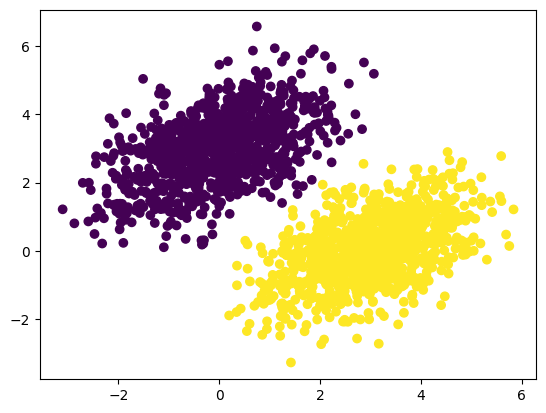

In [77]:
pred = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=pred[:, 0] > 0.5)
plt.show()

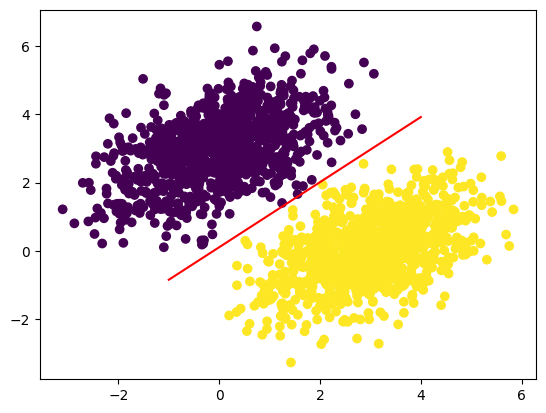

In [78]:
x = np.linspace(-1, 4, 1000)

y = -W[0] / W[1] * x + (0.5 - b) / W[1] # decision boundary

plt.plot(x, y,  "-r")

plt.scatter(inputs[:, 0], inputs[:, 1], c=pred[:, 0] > 0.5)
